# Image Clasification: OpenVINO inference

In this notebook, we will use the OpenVINO toolkit to perform inference on the image classification model we trained in the previous notebook. We have used the model optimizer to convert our previously trained model from to the Intermediate Representation (IR). Now, we will perform inference using the Inference Engine.

## Import libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

from pathlib import Path
import sys

Define the path to the model IR files

In [2]:
model_xml_path = "resources/models/intel_images_cnn.xml"
model_bin_path = "resources/models/intel_images_cnn.bin"

## Initialize the OpenVINO inference engine

Initialize an instance of the OpenVINO Inference Engine Core and then prints out the available devices that can be used for inference.

In [3]:
ie = Core()
print(ie.available_devices)

['CPU', 'GNA', 'MYRIAD']
[E:] [BSL] found 0 ioexpander device


Define the device to use for inference. Then, read the model IR files. Compile the model for the specified device, and then sets the input and output layers.

In [4]:
device = "MYRIAD"
model = ie.read_model(model=model_xml_path)
compiled_model = ie.compile_model(model=model, device_name=device)

input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output(0)
print(input_layer_ir.shape)

[1,150,150,3]


Read the image and pre-process it for inference.

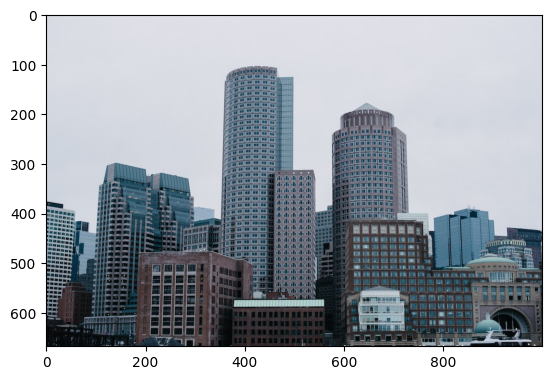

In [5]:
#image = cv2.imread("resources/images/city_crosswalk.jpg")
#image = cv2.imread("resources/images/forest_image.jpg")
image = cv2.imread("resources/images/building_photos.jpg")
N, H, W, C = input_layer_ir.shape
resized_image = cv2.resize(image, (W, H))/255.0
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Run inference

Run inference on the image and print out the model's prediction.

In [6]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

result = compiled_model.infer_new_request({0: input_image})
prediction = result[output_layer_ir]
print(f"The image is a {labels[np.argmax(prediction)]}")

The image is a buildings


Finally, we can measure the inference time and print it out.

In [8]:
import time

start_time = time.time()
result = compiled_model.infer_new_request({0: input_image})
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time: {inference_time:.3f} seconds")

prediction = result[output_layer_ir]
print(f"The image is a {labels[np.argmax(prediction)]}")

Inference time: 0.017 seconds
The image is a buildings
